# Dating Cleaning and Processing

## Process the Moncrieff Translation from Project Gutenberg

In [1]:
import requests

# URL of the Moncrieff translation of Swann's Way
url = "https://www.gutenberg.org/cache/epub/7178/pg7178.txt"

# Send GET request
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    raw_text = response.text
    print("Download successful!")
else:
    raise Exception(f"Failed to fetch text: Status code {response.status_code}")


Download successful!


In [2]:
def extract_main_text(text):
    start_phrase = "For a long time I used to go to bed early"
    end_marker = "*** END OF THE PROJECT GUTENBERG"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)
    return text[start_idx:end_idx].strip()
moncrieff_clean_text = extract_main_text(raw_text)


In [3]:
def extract_combray_text(text):
    start_phrase = "For a long time I used to go to bed early"
    end_marker = "To admit you to"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)


    return text[start_idx:end_idx].strip()
moncrieff_combray_clean_text = extract_combray_text(raw_text)

moncrieff_combray_clean_text = moncrieff_combray_clean_text.split('SWANN IN LOVE')[0].strip()

In [4]:
def extract_swanninlove_text(text):
    start_phrase = "To admit you to the"
    end_marker = "Among the rooms which used most commonly to take shape"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)

    if start_idx == -1:
        raise ValueError("Start phrase not found.")
    if end_idx == -1:
        raise ValueError("End marker not found.")

    return text[start_idx:end_idx].strip()
moncrieff_swanninlove_clean_text = extract_swanninlove_text(raw_text)
moncrieff_swanninlove_clean_text = moncrieff_swanninlove_clean_text.split('PLACE-NAMES: THE NAME')[0].strip()

In [5]:
def extract_placenames_text(text):
    start_phrase = "Among the rooms which used most commonly to take shape in my mind"
    end_marker = "*** END OF THE PROJECT GUTENBERG"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)

    if start_idx == -1:
        raise ValueError("Start phrase not found.")
    if end_idx == -1:
        raise ValueError("End marker not found.")

    return text[start_idx:end_idx].strip()
moncrieff_placenames_clean_text = extract_placenames_text(raw_text)
moncrieff_swanninlove_clean_text = moncrieff_swanninlove_clean_text.split('PLACE-NAMES: THE NAME')[0].strip()


## Processing the Original French Text from Project Gutenberg

In [6]:

url = "https://www.gutenberg.org/cache/epub/2650/pg2650.txt"

response = requests.get(url)

if response.status_code == 200:
    raw_text = response.text


In [7]:
def extract_main_text(text):
    start_phrase = "Longtemps, "
    end_marker = "*** END OF THE PROJECT GUTENBERG"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)

    if start_idx == -1:
        raise ValueError("Start phrase not found.")
    if end_idx == -1:
        raise ValueError("End marker not found.")

    return text[start_idx:end_idx].strip()


french_clean_text = extract_main_text(raw_text)


In [8]:
def extract_french_combray_text(text):
    start_phrase = "Longtemps, je me suis couch"
    end_marker = "DEUXIÈME PARTIE"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)

    if start_idx == -1:
        raise ValueError("Start phrase not found.")
    if end_idx == -1:
        raise ValueError("End marker not found.")

    return text[start_idx:end_idx].strip()
french_combray_clean_text = extract_french_combray_text(french_clean_text)

In [9]:
def extract_french_swanninlove_text(text):
    start_phrase = "Pour faire partie du"
    end_marker = "TROISIÈME PARTIE"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)

    if start_idx == -1:
        raise ValueError("Start phrase not found.")
    if end_idx == -1:
        raise ValueError("End marker not found.")

    return text[start_idx:end_idx].strip()
french_swanninlove_clean_text = extract_french_swanninlove_text(french_clean_text)

In [10]:
def extract_french_placenames_text(text):
    start_phrase = "Parmi les chambres dont"
    end_marker = ", comme les années"

    start_idx = text.find(start_phrase)
    end_idx = text.find(end_marker)

    if start_idx == -1:
        raise ValueError("Start phrase not found.")
    if end_idx == -1:
        raise ValueError("End marker not found.")

    return text[start_idx:end_idx].strip()
french_placenames_clean_text = extract_french_placenames_text(french_clean_text)
french_placenames_clean_text += ", comme les années"


# Word Frequency and Sentence Length Distribution

## Moncrieff

### Moncrieff- Sentence Length Distribution

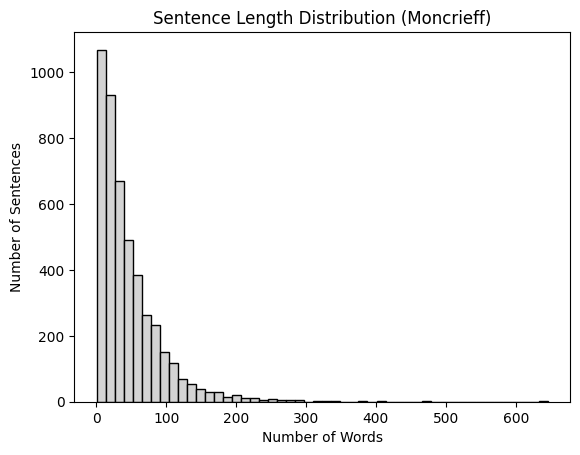

In [11]:
import spacy
import re
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2_000_000
nlp.disable_pipes("parser") 
nlp.add_pipe("sentencizer")

def preprocess_text(text):
    abbreviations = ['Mme', 'M', 'Dr', 'Mr', 'Mrs', 'Mlle', 'St']
    for abbr in abbreviations:
        text = re.sub(rf'\b{abbr}\.?\*?(?=\s)', abbr, text)
    text = re.sub(r'[\n\s][\'"”’][\n\s]', ' ', text)
    text = re.sub(r'\b([A-Z][a-zéèêàùâîôçëïü\-]{2,})\.(?=\s+\w+)', r'\1<PERIOD>', text)

    return text

def postprocess_sentences(sentences):
    return [s.replace('<PERIOD>', '.').strip() for s in sentences]


fixed_text = preprocess_text(moncrieff_clean_text)
doc = nlp(fixed_text)

short_sentences = [
    s
    for s in postprocess_sentences([sent.text.strip() for sent in doc.sents])
    if len([token for token in nlp(s) if not token.is_punct]) <= 2
]


doc = nlp(fixed_text)

sentence_lengths = [len([token for token in sent if not token.is_punct]) for sent in doc.sents]


plt.hist(sentence_lengths, bins=50, edgecolor='black', color = 'lightgrey')
plt.title("Sentence Length Distribution (Moncrieff)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Sentences")

plt.show()

### Moncrieff- Word Frequency Distribution

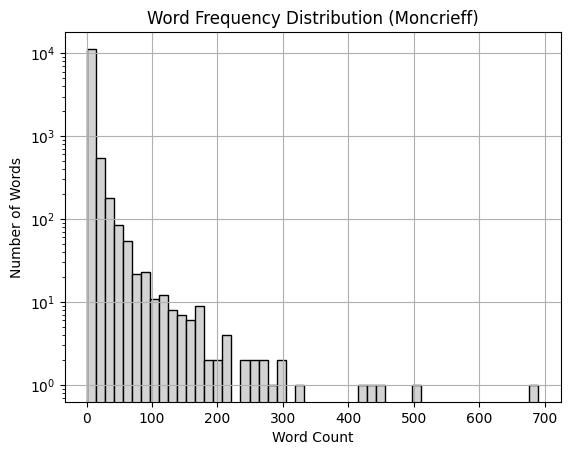

In [12]:

from collections import Counter
pos_counts = {}
for token in doc:
    pos_counts[token.pos_] = pos_counts.get(token.pos_, 0) + 1

words = [
    token.text.lower()
    for token in doc
    if token.is_alpha and not token.is_stop
]

word_freq = Counter(words)

counts = list(word_freq.values())

plt.hist(counts, bins=50, log=True, edgecolor='black', color = 'lightgrey')
plt.title("Word Frequency Distribution (Moncrieff)")
plt.xlabel("Word Count")
plt.ylabel("Number of Words")
plt.grid(True)
plt.show()




### Moncrieff- Zipf's Law

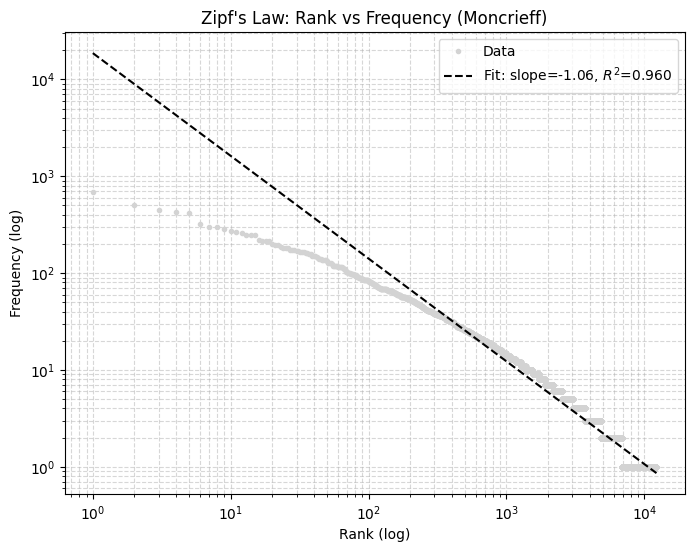

In [13]:

import numpy as np
from scipy.stats import linregress


frequencies = sorted(word_freq.values(), reverse=True)
ranks = np.arange(1, len(frequencies) + 1)

log_ranks = np.log(ranks)
log_freqs = np.log(frequencies)

slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_freqs)
r_squared = r_value ** 2

plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker=".", linestyle="none", color="lightgrey", label="Data")

regression_line = np.exp(intercept) * ranks**slope
plt.loglog(ranks, regression_line, linestyle="--", color="black", label=f"Fit: slope={slope:.2f}, $R^2$={r_squared:.3f}")

plt.title("Zipf's Law: Rank vs Frequency (Moncrieff)")
plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()



## French

## French - Sentence Length Distribution

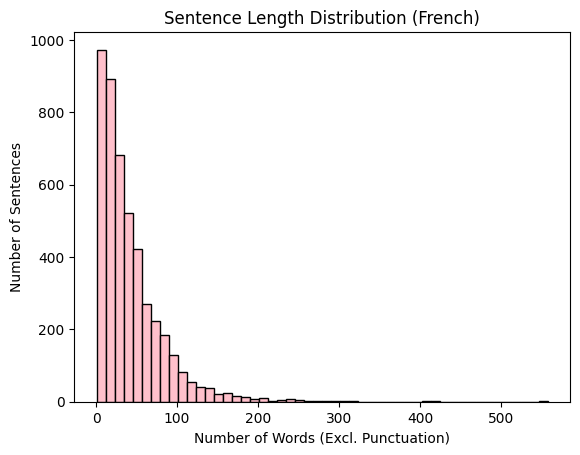

In [14]:
import re
import spacy
import matplotlib.pyplot as plt

nlp = spacy.blank("fr")
nlp.add_pipe("sentencizer")

def preprocess_text(text):
    abbreviations = ['Mme', 'M', 'Dr', 'Mr', 'Mrs', 'Mlle', 'St']
    for abbr in abbreviations:
        text = re.sub(rf'\b{abbr}\.?\*?(?=\s)', abbr, text)

    text = re.sub(r'[\n\s][\'"”’][\n\s]', ' ', text)

    text = re.sub(r'\b([A-ZÉÀÈÂÊÎÔÛÇ][a-zéèêàùâîôçëïü\-]{2,})\.(?=\s+[a-zà-ÿ])', r'\1<PERIOD>', text)

    return text

def postprocess_sentences(sentences):
    return [s.replace('<PERIOD>', '.').strip() for s in sentences]

fixed_text = preprocess_text(french_clean_text)
nlp.max_length = 2_000_000

doc = nlp(fixed_text)


sentence_lengths = [
    len([token for token in sent if not token.is_punct])
    for sent in doc.sents
]


plt.hist(sentence_lengths, bins=50, edgecolor='black', color = 'pink')
plt.title("Sentence Length Distribution (French)")
plt.xlabel("Number of Words (Excl. Punctuation)")
plt.ylabel("Number of Sentences")
plt.show()



## French - Word Frequency Distribution

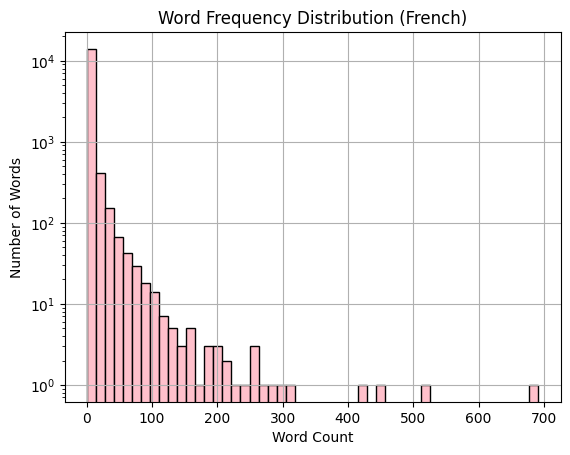

In [15]:
pos_counts = {}
for token in doc:
    pos_counts[token.pos_] = pos_counts.get(token.pos_, 0) + 1

words = [
    token.text.lower()
    for token in doc
    if token.is_alpha and not token.is_stop
]

# Count word frequencies
word_freq = Counter(words)
# Get just the counts
counts = list(word_freq.values())

# Plot the histogram
plt.hist(counts, bins=50, log=True, edgecolor='black', color = 'pink')
plt.title("Word Frequency Distribution (French)")
plt.xlabel("Word Count")
plt.ylabel("Number of Words")
plt.grid(True)
plt.show()




## French - Zipf's Law

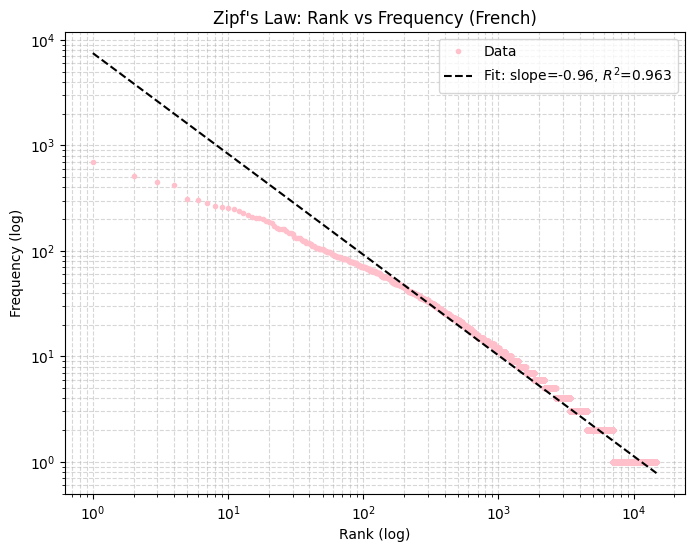

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

frequencies = sorted(word_freq.values(), reverse=True)
ranks = np.arange(1, len(frequencies) + 1)


log_ranks = np.log(ranks)
log_freqs = np.log(frequencies)


slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_freqs)
r_squared = r_value ** 2

plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker=".", linestyle="none", color="pink", label="Data")

regression_line = np.exp(intercept) * ranks**slope
plt.loglog(ranks, regression_line, linestyle="--", color="black", label=f"Fit: slope={slope:.2f}, $R^2$={r_squared:.3f}")

plt.title("Zipf's Law: Rank vs Frequency (French)")
plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()



# Sentiment Analysis

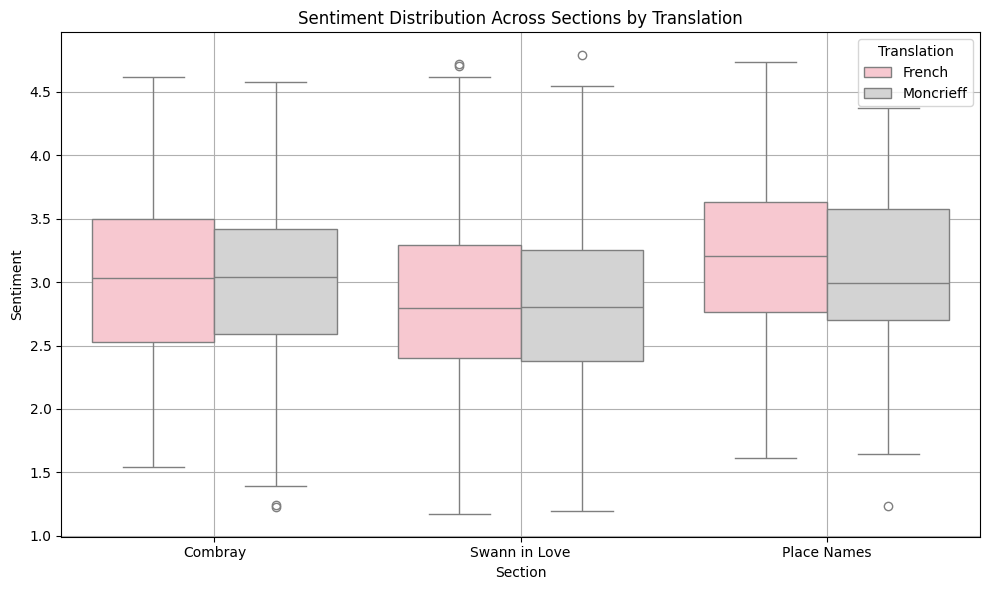

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch 
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

def get_sentiment_score(text):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors="pt", truncation=True)
        outputs = model(**inputs)
        scores = softmax(outputs.logits.detach().numpy()[0])
        return sum((i+1) * s for i,s in enumerate(scores))  # 1–5 weighted avg

def get_paragraphs(text):
    return [p.strip() for p in text.split('\r\n\r\n') if p.strip()]

def get_sentiments(paragraphs):
    return [get_sentiment_score(p) for p in paragraphs]

french_combray_paragraphs = get_paragraphs(french_combray_clean_text)
french_swanninlove_paragraphs = get_paragraphs(french_swanninlove_clean_text)
french_placenames_paragraphs = get_paragraphs(french_placenames_clean_text)

moncrieff_combray_paragraphs = get_paragraphs(moncrieff_combray_clean_text)
moncrieff_swanninlove_paragraphs = get_paragraphs(moncrieff_swanninlove_clean_text)
moncrieff_placenames_paragraphs = get_paragraphs(moncrieff_placenames_clean_text)

french_combray_sentiments = get_sentiments(french_combray_paragraphs)
french_swanninlove_sentiments = get_sentiments(french_swanninlove_paragraphs)
french_placenames_sentiments = get_sentiments(french_placenames_paragraphs)

moncrieff_combray_sentiments = get_sentiments(moncrieff_combray_paragraphs)
moncrieff_swanninlove_sentiments = get_sentiments(moncrieff_swanninlove_paragraphs)
moncrieff_placenames_sentiments = get_sentiments(moncrieff_placenames_paragraphs)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Sentiment': (
        french_combray_sentiments + french_swanninlove_sentiments + french_placenames_sentiments +
        moncrieff_combray_sentiments + moncrieff_swanninlove_sentiments + moncrieff_placenames_sentiments
    ),
    'Section': (
        ['Combray'] * len(french_combray_sentiments) +
        ['Swann in Love'] * len(french_swanninlove_sentiments) +
        ['Place Names'] * len(french_placenames_sentiments) +
        ['Combray'] * len(moncrieff_combray_sentiments) +
        ['Swann in Love'] * len(moncrieff_swanninlove_sentiments) +
        ['Place Names'] * len(moncrieff_placenames_sentiments)
    ),
    'Translation': (
        ['French'] * (
            len(french_combray_sentiments) +
            len(french_swanninlove_sentiments) +
            len(french_placenames_sentiments)
        ) +
        ['Moncrieff'] * (
            len(moncrieff_combray_sentiments) +
            len(moncrieff_swanninlove_sentiments) +
            len(moncrieff_placenames_sentiments)
        )
    )
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Section', y='Sentiment', hue='Translation', data=df,
            palette={"French": "pink", "Moncrieff": "lightgray"})
plt.title("Sentiment Distribution Across Sections by Translation")
plt.grid(True)
plt.legend(title="Translation")
plt.tight_layout()
plt.show()


# Sentiment Arc

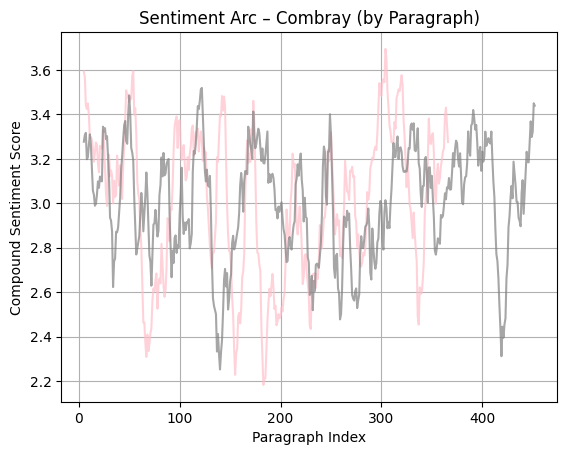

In [18]:

rolling_french = pd.Series(french_combray_sentiments).rolling(window=10, center=True).mean()
rolling_moncrieff = pd.Series(moncrieff_combray_sentiments).rolling(window=10, center=True).mean()

plt.plot(rolling_french, alpha=0.7, color = 'pink', label = 'French Original' )
plt.plot(rolling_moncrieff, alpha = 0.7, color  = 'grey', label = 'Moncrieff Translation')
plt.title("Sentiment Arc – Combray (by Paragraph)")
plt.xlabel("Paragraph Index")
plt.ylabel("Compound Sentiment Score")
plt.grid(True)
plt.show()


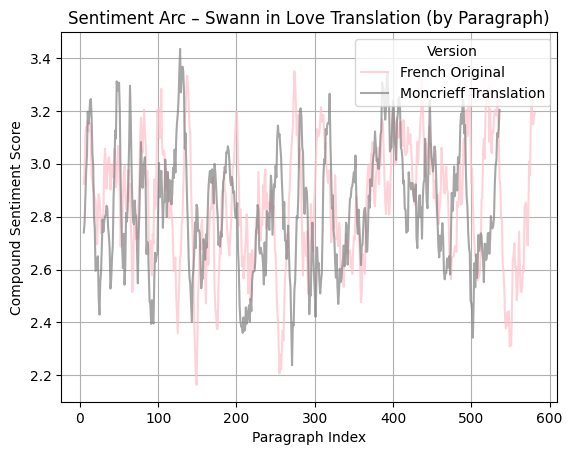

In [19]:
rolling_french = pd.Series(french_swanninlove_sentiments).rolling(window=10, center=True).mean()
rolling_moncrieff = pd.Series(moncrieff_swanninlove_sentiments).rolling(window=10, center=True).mean()
plt.plot(rolling_french, alpha=0.7, color = 'pink', label = 'French Original' )
plt.plot(rolling_moncrieff, alpha = 0.7, color  = 'grey', label = 'Moncrieff Translation')
plt.title("Sentiment Arc – Swann in Love Translation (by Paragraph)")
plt.xlabel("Paragraph Index")
plt.ylabel("Compound Sentiment Score")
plt.grid(True)
plt.legend(title="Version", loc="upper right")
plt.show()

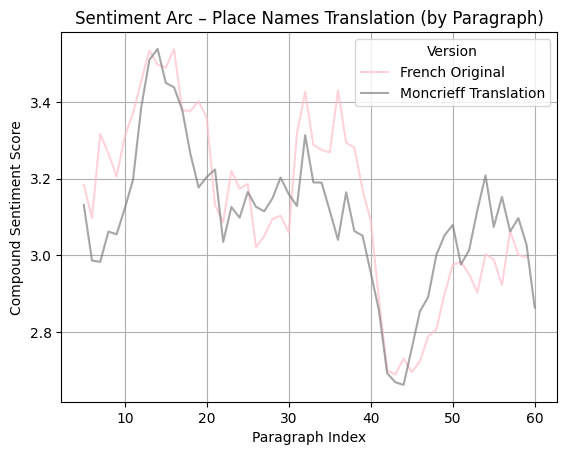

In [20]:
rolling_french = pd.Series(french_placenames_sentiments).rolling(window=10, center=True).mean()
rolling_moncrieff = pd.Series(moncrieff_placenames_sentiments).rolling(window=10, center=True).mean()
plt.plot(rolling_french, alpha=0.7, color = 'pink', label = 'French Original' )
plt.plot(rolling_moncrieff, alpha = 0.7, color  = 'grey', label = 'Moncrieff Translation')
plt.title("Sentiment Arc – Place Names Translation (by Paragraph)")
plt.xlabel("Paragraph Index")
plt.ylabel("Compound Sentiment Score")
plt.grid(True)
plt.legend(title="Version", loc="upper right")
plt.show()

# Semantic Similarity

In [21]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/LaBSE')

embeddings_combray_french = model.encode(french_combray_paragraphs, convert_to_tensor=True)
embeddings_combray_moncrieff= model.encode(moncrieff_combray_paragraphs, convert_to_tensor=True)

embeddings_swanninlove_french = model.encode(french_swanninlove_paragraphs, convert_to_tensor=True)
embeddings_swanninlove_moncrieff= model.encode(moncrieff_swanninlove_paragraphs, convert_to_tensor=True)

embeddings_placenames_french = model.encode(french_placenames_paragraphs, convert_to_tensor=True)
embeddings_placenames_moncrieff= model.encode(moncrieff_placenames_paragraphs, convert_to_tensor=True)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


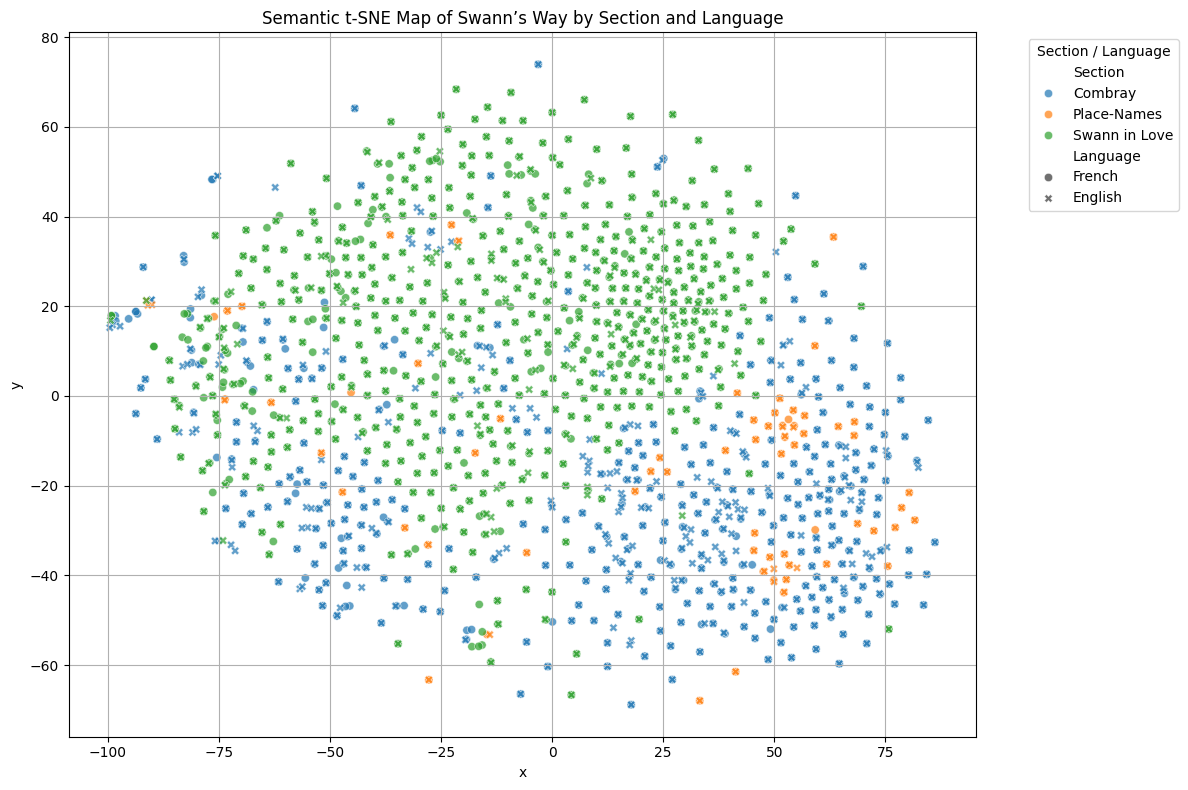

In [22]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Combine embeddings
all_embeddings = torch.cat([
    embeddings_combray_french,
    embeddings_combray_moncrieff,
    embeddings_placenames_french,
    embeddings_placenames_moncrieff,
    embeddings_swanninlove_french,
    embeddings_swanninlove_moncrieff
])

# Create labels
section_labels = (
    ['Combray'] * len(embeddings_combray_french) +
    ['Combray'] * len(embeddings_combray_moncrieff) +
    ['Place-Names'] * len(embeddings_placenames_french) +
    ['Place-Names'] * len(embeddings_placenames_moncrieff) +
    ['Swann in Love'] * len(embeddings_swanninlove_french) +
    ['Swann in Love'] * len(embeddings_swanninlove_moncrieff)
)

language_labels = (
    ['French'] * len(embeddings_combray_french) +
    ['English'] * len(embeddings_combray_moncrieff) +
    ['French'] * len(embeddings_placenames_french) +
    ['English'] * len(embeddings_placenames_moncrieff) +
    ['French'] * len(embeddings_swanninlove_french) +
    ['English'] * len(embeddings_swanninlove_moncrieff)
)

# Dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)
reduced = tsne.fit_transform(all_embeddings.cpu().numpy())

# Step 4: Construct DataFrame for plotting
df = pd.DataFrame({
    'x': reduced[:, 0],
    'y': reduced[:, 1],
    'Section': section_labels,
    'Language': language_labels
})

# Visualize
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x', y='y', hue='Section', style='Language', alpha=0.7)
plt.title("Semantic t-SNE Map of Swann’s Way by Section and Language")
plt.grid(True)
plt.legend(title='Section / Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Topic Modeling

## French Model

In [23]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import spacy
nlp_fr = spacy.load("fr_core_news_sm")

CHARACTER_NAMES = {"swann", "françoise", "gilberte", "charles", "maman", "papa", "nora", "odette", "nannie", "charlus", "comte", "forcheville", "bloch", "verdurin", "mme", "adolphe", "leonie", "eulalie", "vinteuil","legrandin"}

def get_french_sentences(text):
    doc = nlp_fr(text)
    return [sent.text.strip() for sent in doc.sents if sent.text.strip()]

def clean_french_sentence(text):
    doc = nlp_fr(text)
    return " ".join([
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.text.lower() not in CHARACTER_NAMES
    ])
nlp_fr.max_length = 200000000
sentences = get_french_sentences(french_clean_text)

sentences_cleaned = [clean_french_sentence(s) for s in sentences if s.strip()]


embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

topic_model = BERTopic(embedding_model=embedding_model, language="multilingual")
topics, probs = topic_model.fit_transform(sentences_cleaned)



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Moncrieff Model

In [24]:
import spacy
nlp_en = spacy.load("en_core_web_sm")
def remove_stopwords_en(text):
    doc = nlp_en(text)
    return " ".join([token.text for token in doc if not token.is_stop and not token.is_punct])
nlp_en.max_length = 2_000_000
doc = nlp_en(moncrieff_clean_text)

CHARACTER_NAMES = {"swann", "françoise", "gilberte", "charles", "maman", "papa", "nora", "odette", "nannie", "charlus", "comte", "forcheville", "bloch", "verdurin", "mme", "adolphe", "leonie", "eulalie", "vinteuil","legrandin"}

def remove_stopwords_with_names(text):
    doc = nlp_fr(text)
    return " ".join([
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.text.lower() not in CHARACTER_NAMES
    ])

sentences = [sent.text for sent in doc.sents]
texts_en = sentences
texts_en_cleaned_1 = [remove_stopwords_en(p) for p in texts_en]
texts_en_cleaned = [remove_stopwords_with_names(p) for p in texts_en_cleaned_1]

embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

topic_model_en = BERTopic(embedding_model=embedding_model, language="english")
topics_en, probs_en = topic_model_en.fit_transform(texts_en_cleaned)


In [25]:
topic_model_en.reduce_topics(texts_en_cleaned, nr_topics=5)
topic_model.reduce_topics(sentences_cleaned, nr_topics=5)

## Topic Heatmap

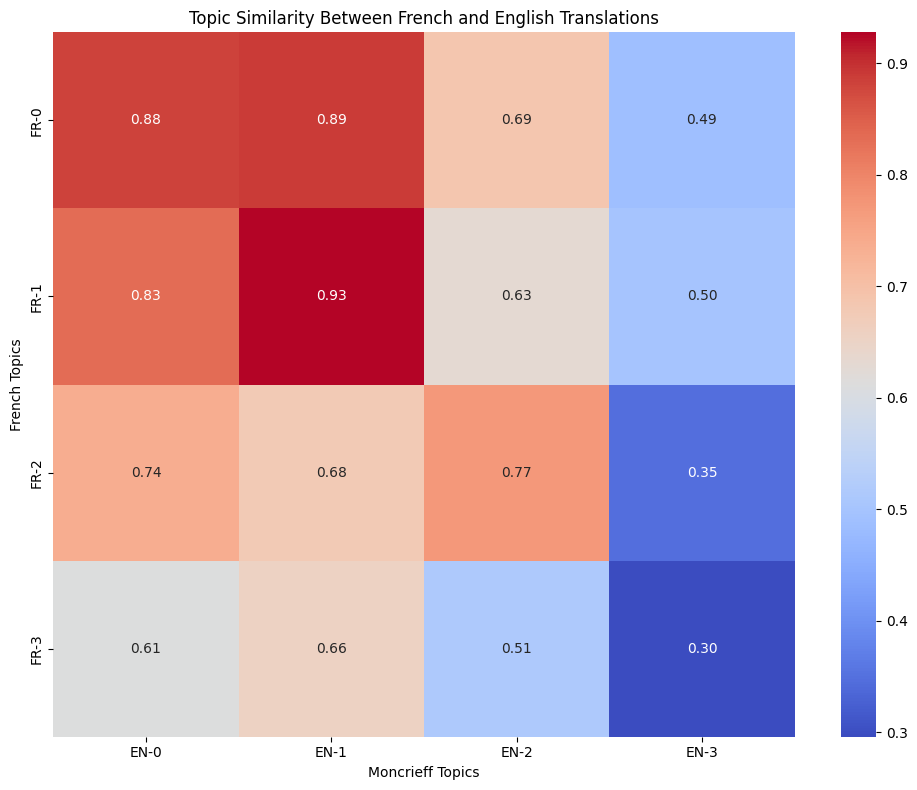

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

french_topic_ids = topic_model.get_topic_freq()["Topic"].tolist()
english_topic_ids = topic_model_en.get_topic_freq()["Topic"].tolist()

french_topic_ids = [i for i in french_topic_ids if i != -1]
english_topic_ids = [i for i in english_topic_ids if i != -1]

french_topic_vectors = np.array([topic_model.topic_embeddings_[i] for i in french_topic_ids])
english_topic_vectors = np.array([topic_model_en.topic_embeddings_[i] for i in english_topic_ids])

similarity_matrix = cosine_similarity(french_topic_vectors, english_topic_vectors)

plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_matrix,
    annot=True, fmt=".2f", cmap="coolwarm",
    xticklabels=[f"EN-{i}" for i in english_topic_ids],
    yticklabels=[f"FR-{i}" for i in french_topic_ids]
)
plt.title("Topic Similarity Between French and English Translations")
plt.xlabel("Moncrieff Topics")
plt.ylabel("French Topics")
plt.tight_layout()
plt.show()
